In [207]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt       # Standard plotting library                 
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again


In [208]:
#read an excel file 
df = pd.read_csv(r'C:\Users\Smegn\Documents\GitHub\AdSmart\AdSmartABdata.csv')
df.head(10)      

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [209]:
import pandas_profiling

In [5]:
#generate html report
df.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [210]:
#convert string to number
df['experiment']=df['experiment'].astype('category').cat.codes
df['device_make']=df['device_make'].astype('category').cat.codes
df['browser']=df['browser'].astype('category').cat.codes

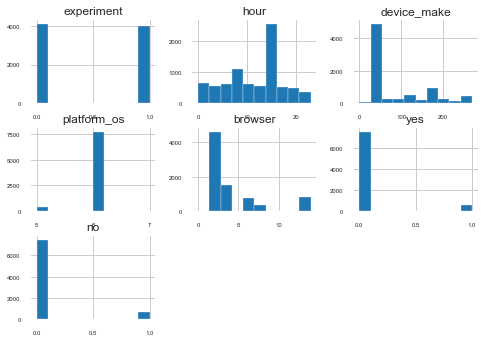

In [211]:
# histograms of the variables
fig = df.hist(xlabelsize=6, ylabelsize=6)
#[x.title.set_size(6) for x in fig.ravel()]
# show the plot
plt.show()

In [212]:
df.describe()

,experiment,hour,device_make,platform_os,browser,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000
mean,0.495976,11.615080,93.095456,5.947134,4.097809,0.070818,0.083075
std,0.500015,5.734879,70.310654,0.224333,3.725419,0.256537,0.276013
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,46.000000,6.000000,2.000000,0.000000,0.000000
50%,0.000000,13.000000,46.000000,6.000000,2.000000,0.000000,0.000000
75%,1.000000,15.000000,141.000000,6.000000,4.000000,0.000000,0.000000
max,1.000000,23.000000,269.000000,7.000000,14.000000,1.000000,1.000000


<AxesSubplot:ylabel='Count'>

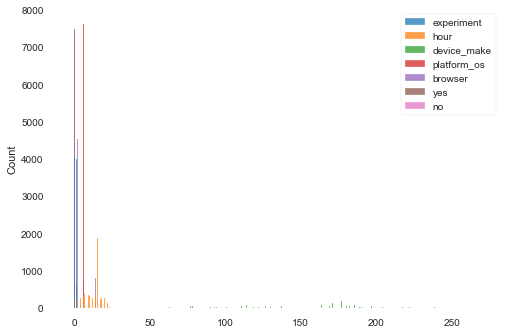

In [213]:
sb.histplot(df)

(array([[0.000e+00, 0.000e+00, 6.460e+02, 1.557e+03, 1.636e+03, 3.375e+03,
         8.630e+02, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.280e+02, 0.000e+00, 0.000e+00, 0.000e+00, 7.648e+03, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.505e+03, 0.000e+00,
         0.000e+00, 0.000e+00, 5.720e+02, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.406e+03, 0.000e+00,
         0.000e+00, 0.000e+00, 6.710e+02, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 4.071e+03, 0.000e+00, 4.006e+03,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 6.094e+03, 1.103e+03,
         4.800e+01, 8.280e+02, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 4.907e+03, 5.540e+02, 1.037e+03,
         1.047e+03, 5.320e+02, 0.000e+00, 0.000e+00]]),
 array([-4.22226583, -3.33067783, -2.43908983, -1.54750182, -0.65591382,
         0.23567418,  

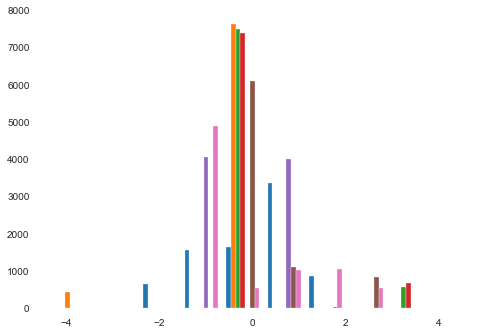

In [244]:
#Since data is sample data and we do not know total poulation so we can use z-score
#to detect and remove outliers
# identify outliers with z-score it helps us to understand
# data value is greater or smaller than mean and how far away it is from the mean.

col_outlier=df[['hour','platform_os','yes','no','experiment','browser','device_make']]
z_scores = stats.zscore(col_outlier)
#find absolute value of each element
abs_z_scores = np. abs(z_scores)
#filter rows with outlier and remove
filtered_entries = (abs_z_scores < 3). all(axis=1)
#cleaned data
new_df = df[filtered_entries]
new_df
plt.hist(z_scores)


<AxesSubplot:ylabel='Count'>

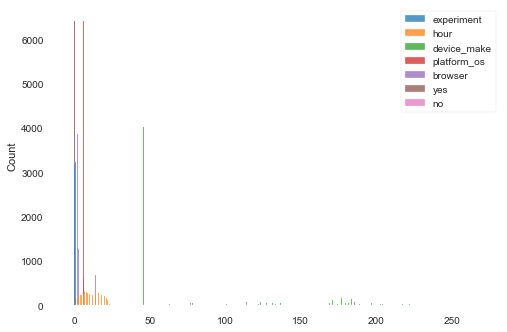

In [216]:
sb.histplot(new_df)

In [217]:
#missing value

new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   6422 non-null   object
 1   experiment   6422 non-null   int8  
 2   date         6422 non-null   object
 3   hour         6422 non-null   int64 
 4   device_make  6422 non-null   int16 
 5   platform_os  6422 non-null   int64 
 6   browser      6422 non-null   int8  
 7   yes          6422 non-null   int64 
 8   no           6422 non-null   int64 
dtypes: int16(1), int64(4), int8(2), object(2)
memory usage: 376.3+ KB


In [218]:

new_df.describe()

,experiment,hour,device_make,platform_os,browser,yes,no
count,6422.000000,6422.000000,6422.000000,6422.0,6422.000000,6422.0,6422.0
mean,0.503270,11.627375,82.779975,6.0,3.858922,0.0,0.0
std,0.500028,5.714749,58.323080,0.0,3.690194,0.0,0.0
min,0.000000,0.000000,0.000000,6.0,0.000000,0.0,0.0
25%,0.000000,7.000000,46.000000,6.0,2.000000,0.0,0.0
50%,1.000000,13.000000,46.000000,6.0,2.000000,0.0,0.0
75%,1.000000,15.000000,123.000000,6.0,3.000000,0.0,0.0
max,1.000000,23.000000,269.000000,6.0,14.000000,0.0,0.0


In [219]:
new_df.corr()

,experiment,hour,device_make,platform_os,browser,yes,no
experiment,1.000000,-0.158363,0.022403,NaN,-0.084405,NaN,NaN
hour,-0.158363,1.000000,-0.010954,NaN,0.039712,NaN,NaN
device_make,0.022403,-0.010954,1.000000,NaN,0.589406,NaN,NaN
platform_os,NaN,NaN,NaN,NaN,NaN,NaN,NaN
browser,-0.084405,0.039712,0.589406,NaN,1.000000,NaN,NaN
yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 From the correlation table we see that variables browser and   device_make correlated  

In [173]:
import scipy.stats as ss

from scipy.stats import pearsonr

C:\Users\Smegn\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 6.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Smegn\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Smegn\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 6.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Smegn\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 6.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Smegn\anaconda3\lib\site-pa

array([[<AxesSubplot:xlabel='experiment', ylabel='experiment'>,
        <AxesSubplot:xlabel='hour', ylabel='experiment'>,
        <AxesSubplot:xlabel='device_make', ylabel='experiment'>,
        <AxesSubplot:xlabel='platform_os', ylabel='experiment'>,
        <AxesSubplot:xlabel='browser', ylabel='experiment'>,
        <AxesSubplot:xlabel='yes', ylabel='experiment'>,
        <AxesSubplot:xlabel='no', ylabel='experiment'>],
       [<AxesSubplot:xlabel='experiment', ylabel='hour'>,
        <AxesSubplot:xlabel='hour', ylabel='hour'>,
        <AxesSubplot:xlabel='device_make', ylabel='hour'>,
        <AxesSubplot:xlabel='platform_os', ylabel='hour'>,
        <AxesSubplot:xlabel='browser', ylabel='hour'>,
        <AxesSubplot:xlabel='yes', ylabel='hour'>,
        <AxesSubplot:xlabel='no', ylabel='hour'>],
       [<AxesSubplot:xlabel='experiment', ylabel='device_make'>,
        <AxesSubplot:xlabel='hour', ylabel='device_make'>,
        <AxesSubplot:xlabel='device_make', ylabel='device_make'>

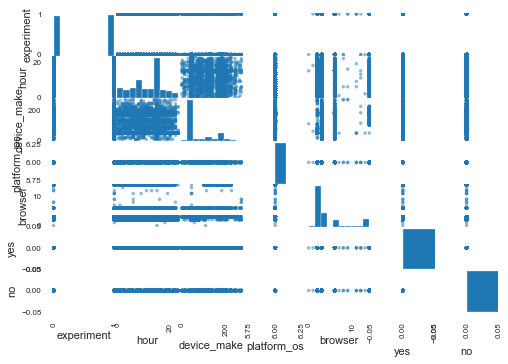

In [174]:
from pandas.plotting import scatter_matrix
import pandas.plotting as plt

plt.scatter_matrix(new_df)

In [227]:

p_value_divice=ss.ttest_ind(new_df['experiment'],df['device_make'])
p_value_platform_os=ss.ttest_ind(new_df['experiment'],df['platform_os'])
p_value_browser=ss.ttest_ind(new_df['experiment'],df['browser'])

print(p_value_divice,p_value_platform_os,p_value_browser,p_value_yes)
#from our analysis we see that P<.01 that is result is highlly significant or very unlikely to be occured by chance so we can rejuct 
#null hypothest

Ttest_indResult(statistic=-105.53014859470021, pvalue=0.0) Ttest_indResult(statistic=-874.055246516407, pvalue=0.0) Ttest_indResult(statistic=-76.7736065119166, pvalue=0.0) Ttest_indResult(statistic=64.21507094963704, pvalue=0.0)


C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


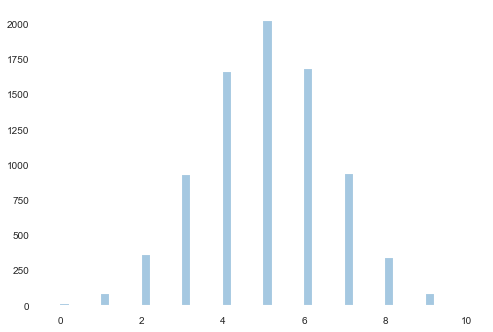

In [229]:
from numpy import random
sb.distplot(random.binomial(n=10, p=0.5, size=8077), hist=True, kde=False)

plt.show()

In [184]:
from statsmodels.formula.api import ols
model = ols("device_make ~ experiment + 1", new_df).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            device_make   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.224
Date:                Wed, 21 Jul 2021   Prob (F-statistic):             0.0726
Time:                        10:28:20   Log-Likelihood:                -35222.
No. Observations:                6422   AIC:                         7.045e+04
Df Residuals:                    6420   BIC:                         7.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4649      1.032     78.904      0.0

In [183]:
from statsmodels.formula.api import ols
model = ols("browser ~ experiment + 1", new_df).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                browser   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     46.07
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.25e-11
Time:                        10:27:59   Log-Likelihood:                -17474.
No. Observations:                6422   AIC:                         3.495e+04
Df Residuals:                    6420   BIC:                         3.497e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1724      0.065     64.084      0.0

In [105]:
from statsmodels.formula.api import ols
model = ols("platform_os ~ experiment + 1", df).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            platform_os   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     84.90
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           3.93e-20
Time:                        08:56:22   Log-Likelihood:                 665.06
No. Observations:                8077   AIC:                            -1326.
Df Residuals:                    8075   BIC:                            -1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.92

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


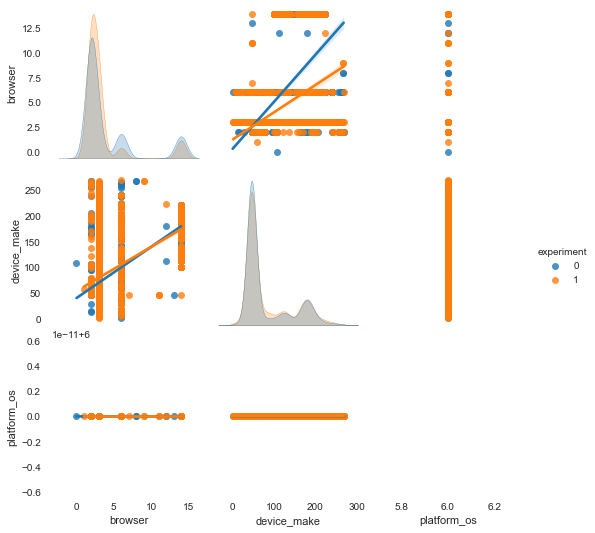

In [186]:
sb.pairplot(new_df, vars=['browser', 'device_make', 'platform_os'],
                 kind='reg', hue='experiment')

In [202]:
# add additional columns to the pivot table
df_testsummary1 = new_df.pivot_table(values='browser', index='experiment', aggfunc=np.sum)

df_testsummary1['total_br'] = new_df.pivot_table(values='browser', index='experiment', aggfunc=lambda x: len(x))
df_testsummary1['rate_br'] = new_df.pivot_table(values='browser', index='experiment')
df_testsummary1

,browser,total_br,rate_br
experiment,,,
0,13310.0,3190,4.172414
1,11472.0,3232,3.549505


In [203]:
df_testsummary = new_df.pivot_table(values='platform_os', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table
df_testsummary['total_pl'] = new_df.pivot_table(values='platform_os', index='experiment', aggfunc=lambda x: len(x))
df_testsummary['rate_pl'] = new_df.pivot_table(values='platform_os', index='experiment')
df_testsummary = new_df.pivot_table(values='platform_os', index='experiment', aggfunc=np.sum)
df_testsummary

,platform_os
experiment,
0,19140
1,19392


C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

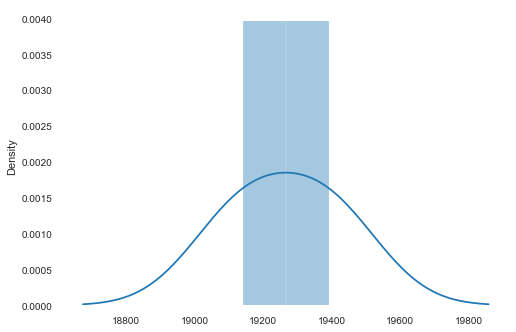

In [204]:
sb.distplot(df_testsummary)

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

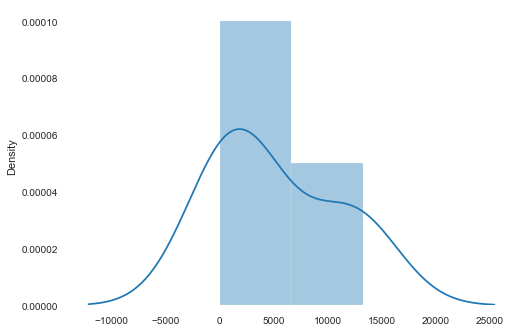

In [205]:
sb.distplot(df_testsummary1)

In [206]:
new_df.initial_split()

AttributeError: 'DataFrame' object has no attribute 'initial_split'

In [ ]:
#where can A/B testing used
Testing impact of platforms_os
driving user growth

#How
understand users which is key performance indicator
identify trands which is do explortory analysis
optimizing performance which is design A/B testing
Data driven decision which is analyze A/B test results

In [ ]:
df.info()

In [ ]:
# Number of Unique User
df.auction_id.nunique() == df.shape[0]

In [ ]:
df.describe()

In [ ]:
# A/B Groups & Target Summary Stats
df.groupby("experiment"). hour.agg(["count", "median", "mean", "std", "max"])

In [ ]:
df = df[df.hour < df.hour.max()]


In [ ]:
# Summary Stats: sum_gamerounds
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["hour"]].T

In [ ]:
df.groupby("hour").auction_id.count().reset_index().head(10)

In [ ]:
#unique values
df.nunique()

In [ ]:
#we have split the dataset into training and testing dataset using the train_test_split() function.
categorical_col_updated = ['auction_id','experment','date','device_make','platform_os','browser']
df_new_cat = pd.get_dummies(df, columns = categorical_col_updated) 